# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

x = np.array([-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3])
y = np.array([-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90])

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [2]:
def design_matrix(x, m):
    n = len(x)
    ones = np.ones(n)
    A = np.ones((n, m + 1))
    for i in range(m):
        A[:, i + 1] = np.multiply(A[:, i], x)
    return A

def solve_normal_equation(x, y, A, m):
    AT = np.transpose(A)
    ATA = AT @ A
    b = AT @ y
    return np.linalg.solve(ATA, b).reshape(-1, 1)


### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

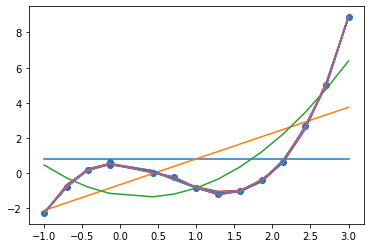

Error is minimum at m = 11
Solution from Normal Equation = [[ 0.39932258]
 [-1.21593995]
 [-0.44792406]
 [ 6.91734557]
 [-7.9927177 ]
 [-7.59451176]
 [13.94182496]
 [-1.75365273]
 [-6.34741927]
 [ 4.26206206]
 [-1.08663724]
 [ 0.10112522]]


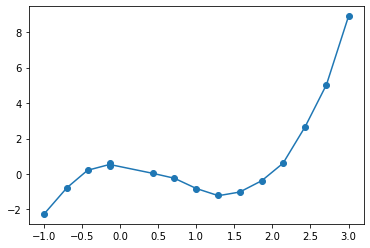

In [3]:
def get_error(P, y, n, m):
    return 1.0 / (n - m) * np.sum((P - y) ** 2)

plt.scatter(x, y)

n = len(x)
errors = []
solutions = []
y_hats = []
for m in range(15):
    A = design_matrix(x, m)
    beta = solve_normal_equation(x, y, A, m)
    y_hat = np.dot(A, beta)[:, 0]
    solutions.append(beta)
    errors.append(get_error(y_hat, y, n, m))
    y_hats.append(y_hat)
    plt.plot(x, y_hat)

plt.show()

min_index = np.argmin(errors)
print(f"Error is minimum at m = {min_index}")

print(f"Solution from Normal Equation = {solutions[min_index]}")
plt.scatter(x, y)
plt.plot(x, y_hats[min_index])
plt.show()


### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [4]:
def lls_qr(y, A):
    return np.linalg.solve(np.dot(A.T, A), np.dot(A.T, y.reshape(-1, 1)))

A = design_matrix(x, min_index)
qr_solution = lls_qr(y, A)
print(f"Solution from QR factorization = {qr_solution}")


Solution from QR factorization = [[ 0.39932258]
 [-1.21593995]
 [-0.44792406]
 [ 6.91734557]
 [-7.9927177 ]
 [-7.59451176]
 [13.94182496]
 [-1.75365273]
 [-6.34741927]
 [ 4.26206206]
 [-1.08663724]
 [ 0.10112522]]


# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

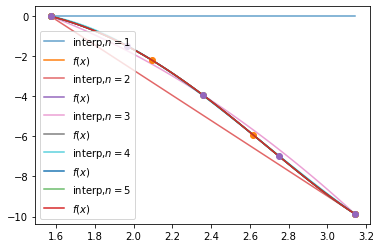

In [5]:
def lagrange_k(xval, xk, k):
    n = len(xk)
    term = 1.0
    for j in range(n):
        if j == k:
            continue
        num = xval - xk[j]
        den = xk[k] - xk[j]
        term *= num / den
    return term

def lagrange(xval, xk, yk):
    return sum([yk[j] * lagrange_k(xval, xk, j) for j in range(len(xk))])

def plot_interp(func, nodes, add_legend=True):
    yy = func(nodes)
    xn = np.linspace(np.pi / 2, np.pi, 100)
    yn = [lagrange(_, nodes, yy) for _ in xn]
    plt.plot(xn, yn, '-', alpha=0.7, label=r'interp,$n=%s$' % len(nodes))
    plt.plot(xn, func(xn), label=r'$f(x)$')
    plt.plot(nodes, yy, 'o')
    if add_legend:
        plt.legend(loc='best')

for m in range(1, 6):
    nodes = np.linspace(np.pi / 2, np.pi, m)
    plot_interp(lambda x: (x**2) * np.cos(x), nodes)

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

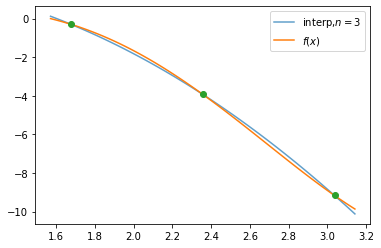

In [6]:
def cheb_nodes(n):
    k = np.arange(n)
    return (np.cos((2 * k + 1) * np.pi / (2 * n))) * 0.25 * np.pi + 0.75 * np.pi

plot_interp(lambda x: (x**2) * np.cos(x), nodes=cheb_nodes(3))